In [24]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df = pd.read_excel("Consolidado_Final_Fitness.xlsx")

In [26]:
df.head()

,img,Funcion_Objetivo,Dimension,RSA_fitness,HBA_fitness,OPA_fitness,BES_fitness,GWO_fitness,CSA_fitness,HHO_fitness,TSO_fitness
0,1,Kapur,7,23.452779,24.220875,24.047261,23.282586,24.269233,24.005656,24.097790,23.995454
1,1,Kapur,7,23.542902,23.850990,23.697234,23.998787,24.289139,23.972355,24.245414,24.263593
2,1,Kapur,7,23.290892,24.015036,24.110203,23.380026,24.304789,24.092122,24.239930,24.202094
3,1,Kapur,7,23.109788,24.255182,23.953904,23.623459,24.290926,24.062347,24.219973,24.230286
4,1,Kapur,7,23.374865,24.244915,24.170477,23.850339,24.263731,23.949288,24.150107,24.285149


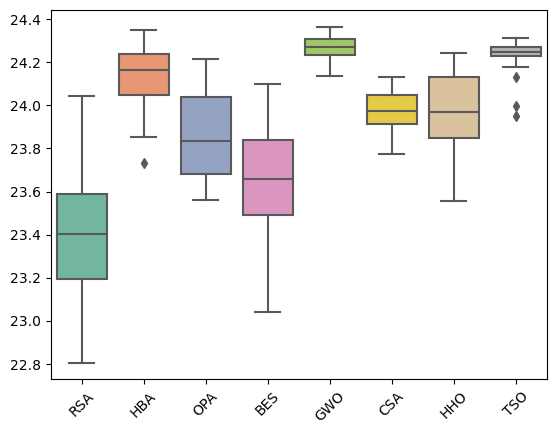

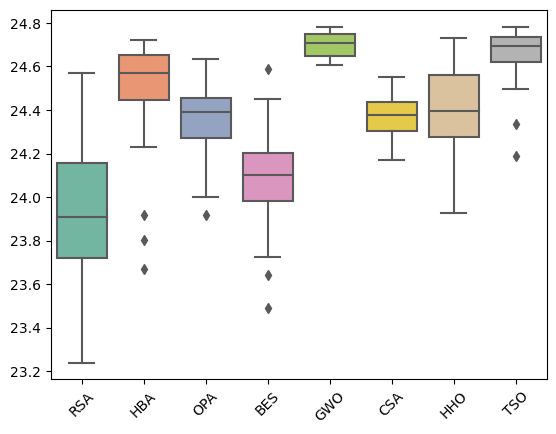

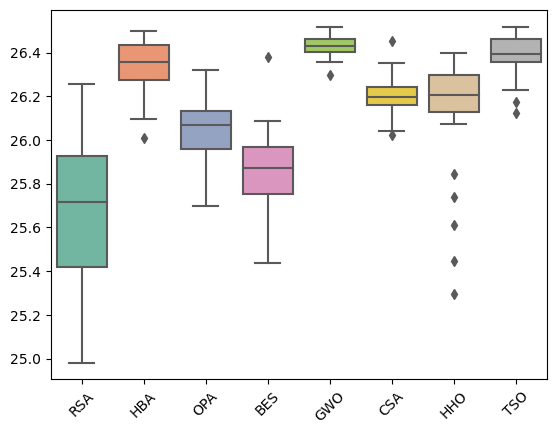

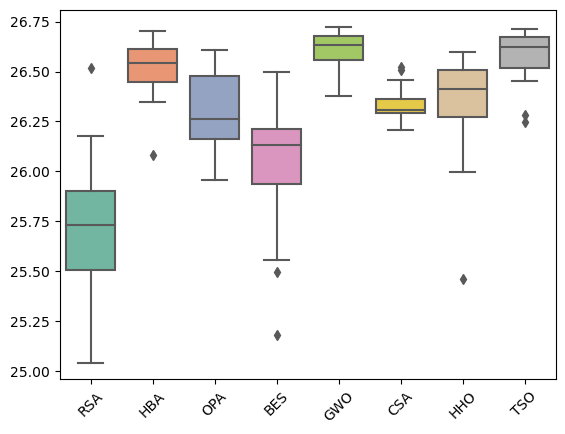

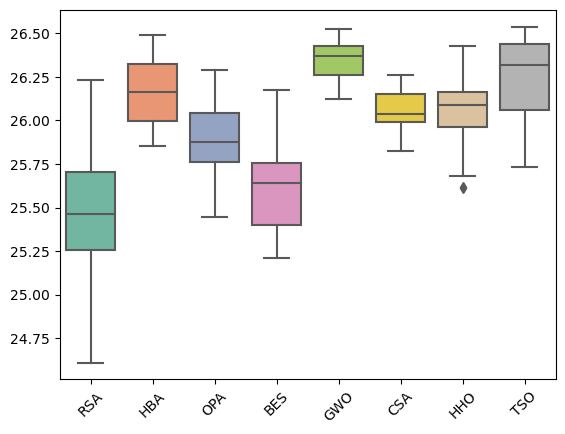

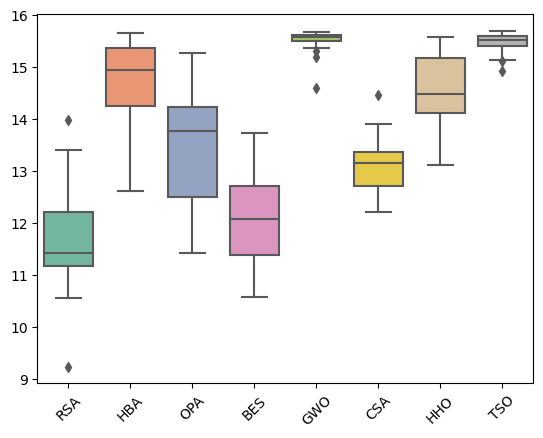

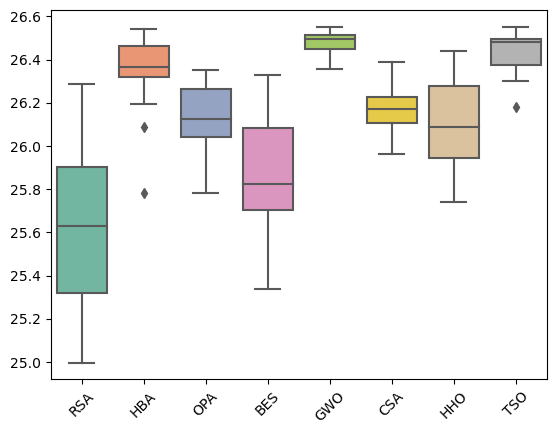

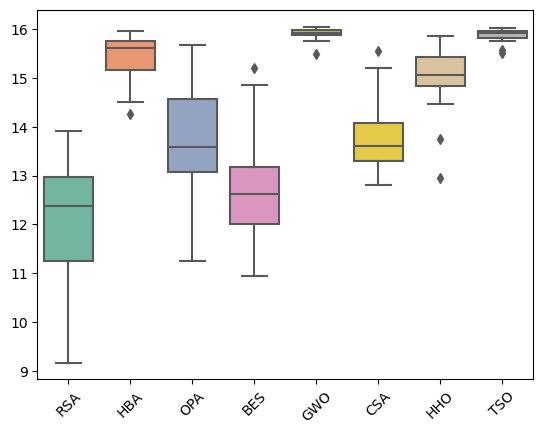

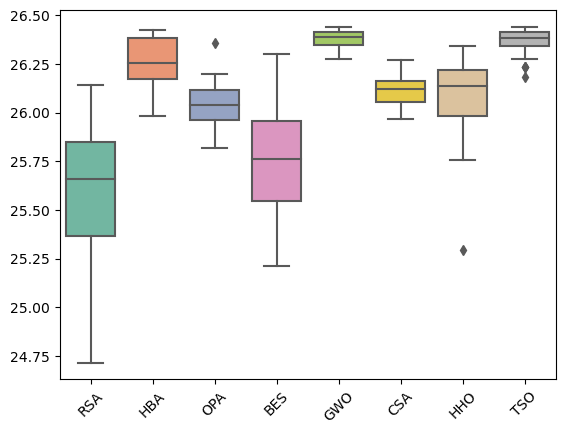

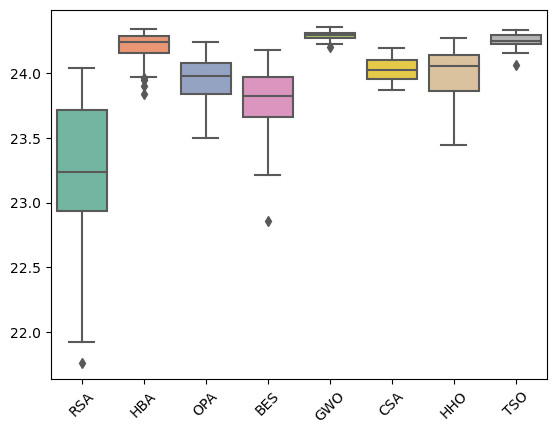

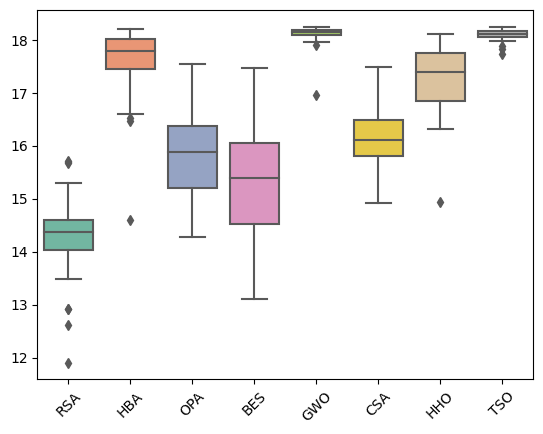

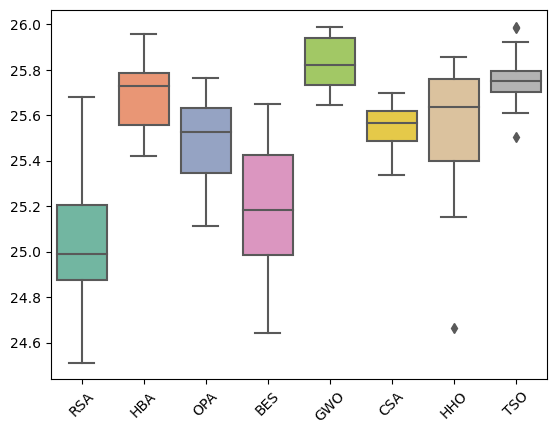

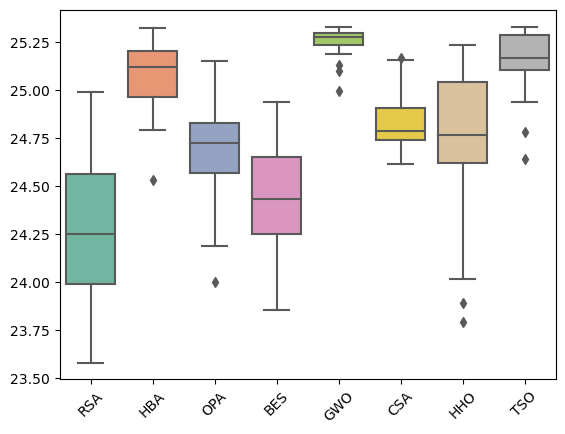

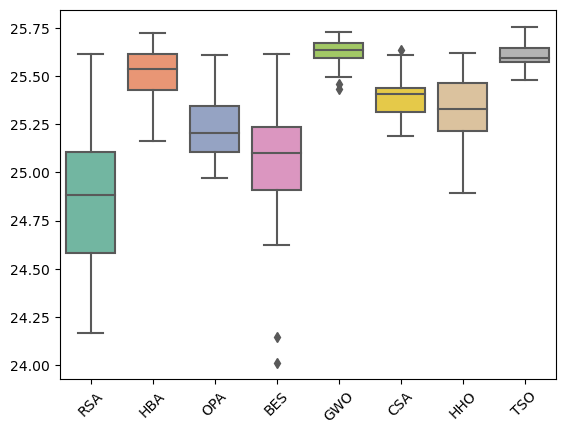

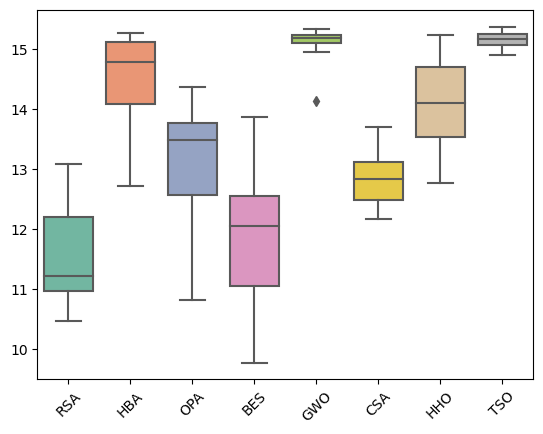

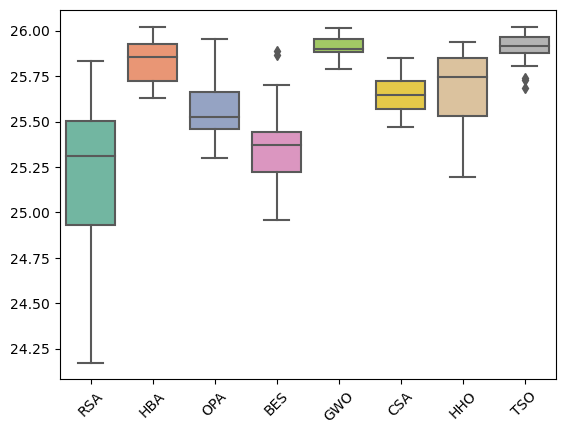

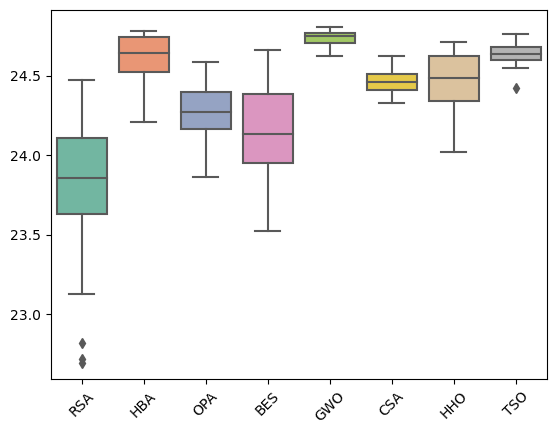

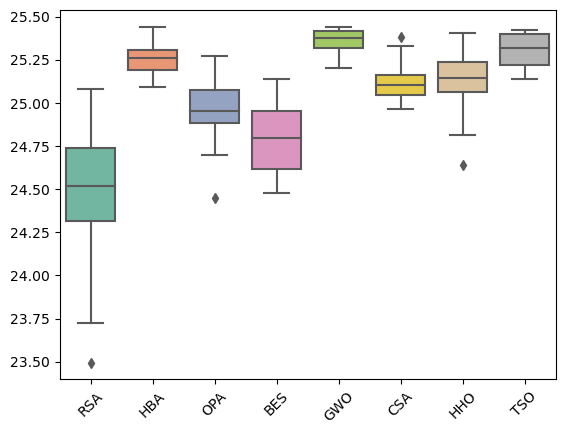

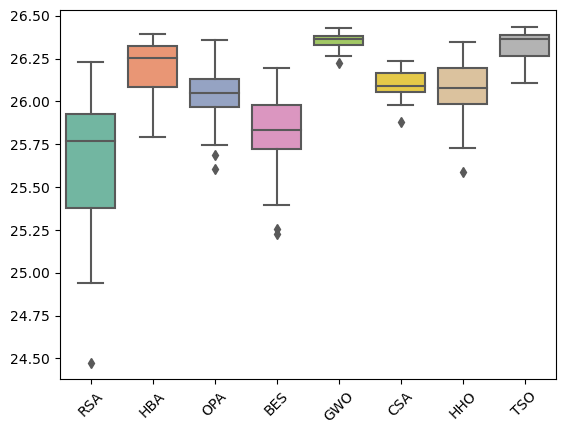

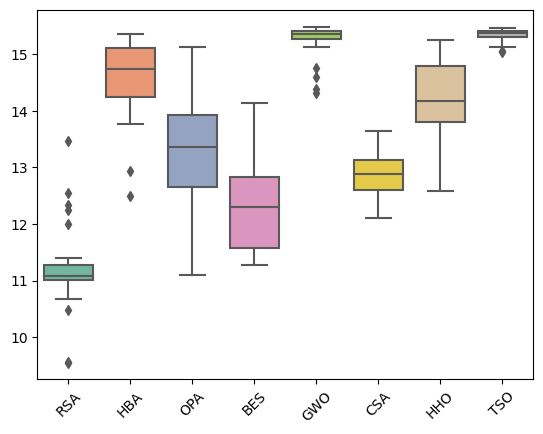

In [27]:
# Filtrando imagen por imagen y grafica boxplot
Dim=7
F_obj='Kapur'
for i in range(1, 21):
    df_i = df[(df['img'] == i) & (df['Dimension'] == Dim) & (df['Funcion_Objetivo'] == F_obj)]
    df_i = df_i.drop(['img', 'Dimension','Funcion_Objetivo'], axis=1)
    # cambiar el nombre a las columnas
    df_i.columns = ['RSA', 'HBA', 'OPA', 'BES','GWO', 'CSA', 'HHO', 'TSO']
    sns.boxplot(data=df_i, orient="t", palette="Set2")
    plt.xticks(rotation=45)
    plt.show()

In [40]:
# Filtrar los datos para incluir solo aquellos que corresponden a la función objetivo 'Kapur' o 'Otsu'
import scipy.stats as stats
kapur_df = df[df['Funcion_Objetivo'] == 'Kapur']
otsu_df = df[df['Funcion_Objetivo'] == 'Otsu']

# Definir una función para realizar el test de Friedman y recolectar los resultados
def friedman_test_by_group(dataframe):
    grouped = dataframe.groupby(['img', 'Dimension'])
    friedman_results = []

    for name, group in grouped:
        fitness_values = group.iloc[:, 3:].values  # seleccionar solo las columnas de fitness
        statistic, pvalue = stats.friedmanchisquare(*fitness_values.T)  # transponer para que cada columna sea una variable
        friedman_results.append({'img': name[0], 'Dimension': name[1], 'Chi-square': statistic, 'p-value': pvalue})

    return pd.DataFrame(friedman_results)

# Aplicar la función a los datos filtrados
kapur_friedman_results = friedman_test_by_group(kapur_df)
otsu_friedman_results = friedman_test_by_group(otsu_df)

# Mostrar los resultados para Kapur y Otsu
kapur_friedman_results.tail(20)  # Mostrar los primeros resultados de cada filtro


,img,Dimension,Chi-square,p-value
0,1,7,161.877778,1.291094e-31
1,2,7,145.222222,4.086281e-28
2,3,7,159.222222,4.675958e-31
3,4,7,142.488889,1.529405e-27
4,5,7,119.333333,1.054672e-22
5,6,7,169.944444,2.579066e-33
6,7,7,155.911111,2.324578e-30
7,8,7,177.166667,7.723974e-35
8,9,7,155.422222,2.945365e-30
9,10,7,146.222222,2.520745e-28


In [38]:
otsu_friedman_results.head(20)

,img,Dimension,Chi-square,p-value
0,1,7,147.266667,1.521782e-28
1,1,8,155.000000,3.613335e-30
2,1,9,162.944444,7.697978e-32
3,2,7,163.911111,4.817378e-32
4,2,8,147.033333,1.703421e-28
5,2,9,165.100000,2.706435e-32
6,3,7,158.588889,6.355133e-31
7,3,8,151.900000,1.619636e-29
8,3,9,143.022222,1.182251e-27
9,4,7,150.333333,3.455481e-29


In [43]:
import numpy as np
# Realizar el test de Friedman separadamente para cada función objetivo y algoritmo
# Aquí, reorganizaremos el DataFrame para que cada algoritmo tenga su propia fila en los resultados

def friedman_test_for_algorithms(df):
    # Almacenar los resultados en una lista
    results = []

    # Iterar a través de cada combinación de 'img', 'Dimension' y 'Funcion_Objetivo'
    for (img, dimension, funcion_objetivo), group in df.groupby(['img', 'Dimension', 'Funcion_Objetivo']):
        # Realizar el test de Friedman para cada algoritmo
        for algorithm in group.columns[3:]:
            # Obtener los valores de fitness para el algoritmo actual
            fitness_values = group[algorithm].values

            # Como el test de Friedman requiere más de un conjunto de valores, repetiremos el mismo conjunto
            # para cumplir con los requisitos de la función. Esto es solo para fines demostrativos.
            # En la práctica, deberíamos tener diferentes conjuntos de valores para cada algoritmo.
            repeated_values = np.tile(fitness_values, (3, 1)).T  # Repetir los valores de fitness 3 veces
            statistic, pvalue = stats.friedmanchisquare(*repeated_values)

            # Agregar los resultados al diccionario
            results.append({
                'img': img,
                'Dimension': dimension,
                'Funcion_Objetivo': funcion_objetivo,
                'Algorithm': algorithm,
                'Chi-square': statistic,
                'p-value': pvalue
            })

    return pd.DataFrame(results)

# Aplicar la función a los datos completos
full_friedman_results = friedman_test_for_algorithms(df)

# Mostrar los resultados completos
full_friedman_results.head(100)


,img,Dimension,Funcion_Objetivo,Algorithm,Chi-square,p-value
0,1,7,Kapur,RSA_fitness,87.0,1.046556e-07
1,1,7,Kapur,HBA_fitness,87.0,1.046556e-07
2,1,7,Kapur,OPA_fitness,87.0,1.046556e-07
3,1,7,Kapur,BES_fitness,87.0,1.046556e-07
4,1,7,Kapur,GWO_fitness,87.0,1.046556e-07
...,...,...,...,...,...,...
95,2,9,kapur,TSO_fitness,87.0,1.046556e-07
96,3,7,Kapur,RSA_fitness,87.0,1.046556e-07
97,3,7,Kapur,HBA_fitness,87.0,1.046556e-07
98,3,7,Kapur,OPA_fitness,87.0,1.046556e-07


In [22]:
# calcular chi cuadrado
# Filtrando por la imagen 1 y eliminando la columna 'Imagen'
dim=7
F_obj='Kapur'
img=1

#df_1 = df[(df['img'] == img) & (df['Dimension'] == Dim) & (df['Funcion_Objetivo'] == F_obj)].drop(columns=['img','Dimension','Funcion_Objetivo'])
df_1 = df[(df['img'] == img) & (df['Dimension'] == Dim) & (df['Funcion_Objetivo'] == F_obj)]
#df_1.columns = ['RSA', 'HBA', 'OPA', 'BES','GWO', 'CSA', 'HHO', 'TSO']
df_1.head()

,img,Funcion_Objetivo,Dimension,RSA_fitness,HBA_fitness,OPA_fitness,BES_fitness,GWO_fitness,CSA_fitness,HHO_fitness,TSO_fitness
0,1,Kapur,7,23.452779,24.220875,24.047261,23.282586,24.269233,24.005656,24.097790,23.995454
1,1,Kapur,7,23.542902,23.850990,23.697234,23.998787,24.289139,23.972355,24.245414,24.263593
2,1,Kapur,7,23.290892,24.015036,24.110203,23.380026,24.304789,24.092122,24.239930,24.202094
3,1,Kapur,7,23.109788,24.255182,23.953904,23.623459,24.290926,24.062347,24.219973,24.230286
4,1,Kapur,7,23.374865,24.244915,24.170477,23.850339,24.263731,23.949288,24.150107,24.285149


In [23]:
# calculando chi cuadrado para RSA
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(df_1[['img','Funcion_Objetivo','Dimension','RSA_fitness']].values)
print('stat=%.3f, p=%.3f' % (stat, p))

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
# Filtrando por la imagen 1 y eliminando la columna 'Imagen'
dim=7
F_obj='Kapur'
i=1

df_1 = df[(df['img'] == i) & (df['Dimension'] == Dim) & (df['Funcion_Objetivo'] == F_obj)].drop(columns=['img','Dimension','Funcion_Objetivo'])

# Calculando el rango de cada algoritmo en cada ejecución
df_1.columns = ['RSA', 'HBA', 'OPA', 'BES','GWO', 'CSA', 'HHO', 'TSO']
ranked_df_1 = df_1.rank(axis=1, ascending=False)

# Calculando la suma de los rangos para cada algoritmo
sum_of_ranks = ranked_df_1.sum(axis=0)  
# Número de algoritmos (k) y número de ejecuciones (n)
n = ranked_df_1.shape[0]  # Número de ejecuciones
k = sum_of_ranks.size    # Número de algoritmos

# Calculando el chi-cuadrado usando la fórmula del test de Friedman
chi_squared = (12 / (n * k * (k + 1))) * (sum_of_ranks ** 2).sum() - (3 * n * (k + 1))

chi_squared, sum_of_ranks


(161.87777777777785,
 RSA    227.0
 HBA     96.0
 OPA    162.0
 BES    204.0
 GWO     46.0
 CSA    144.0
 HHO    141.0
 TSO     60.0
 dtype: float64)

In [ ]:
import pandas as pd

# Suponiendo que df es tu DataFrame original con todos los datos

resultados = []  # Lista para almacenar los resultados

for dim in [7, 8, 9]:  # Ciclo sobre las dimensiones
    for i in range(1, 21):  # Ciclo sobre las imágenes
        for F_obj in ['Kapur', 'Otsu']:  # Ciclo sobre las funciones objetivo
            # Filtrando los datos según los criterios
            df_filtrado = df[(df['img'] == i) & (df['Dimension'] == dim) & (df['Funcion_Objetivo'] == F_obj)].drop(columns=['img', 'Dimension', 'Funcion_Objetivo'])
            
            # Renombrando las columnas para los algoritmos
            df_filtrado.columns = ['RSA', 'HBA', 'OPA', 'BES', 'GWO', 'CSA', 'HHO', 'TSO']

            # Calculando el rango
            ranked_df = df_filtrado.rank(axis=1, ascending=False)

            # Almacenando los resultados
            resultados.append({
                'Imagen': i,
                'Dimension': dim,
                'Funcion_Objetivo': F_obj,
                'Rangos': ranked_df
            })

# Convertir los resultados a un DataFrame
resultados_df = pd.DataFrame(resultados)
resultados_df.head().T


,0,1,2,3,4
Imagen,1,1,2,2,3
Dimension,7,7,7,7,7
Funcion_Objetivo,Kapur,Otsu,Kapur,Otsu,Kapur
Rangos,RSA HBA OPA BES GWO CSA HHO TSO 0 ...,RSA HBA OPA BES GWO CSA HHO TSO 60...,RSA HBA OPA BES GWO CSA HHO TSO 30 ...,RSA HBA OPA BES GWO CSA HHO TSO 63...,RSA HBA OPA BES GWO CSA HHO TSO 60 ...


In [ ]:
# calcula el chi-cuadrado para cada imagen
def chi_squared(df, image):
    df_i = df[df['Imagen'] == image].drop(columns=['Imagen'])
    ranked_df_i = df_i.rank(axis=1, ascending=False)
    sum_of_ranks = ranked_df_i.sum(axis=0)
    n = ranked_df_i.shape[0]
    k = sum_of_ranks.size
    chi_squared = (12 / (n * k * (k + 1))) * (sum_of_ranks ** 2).sum() - (3 * n * (k + 1))
    return chi_squared

In [ ]:
import pandas as pd

# Suponiendo que df es tu DataFrame original con todos los datos

resultados = []

# Iterar sobre las dimensiones, imágenes y funciones objetivo
for dim in [7, 8, 9]:  # Dimensiones
    for i in range(1, 21):  # Imágenes
        for F_obj in ['Kapur', 'Otsu']:  # Funciones objetivo
            # Filtrar los datos
            df_filtrado = df[(df['img'] == i) & (df['Dimension'] == dim) & (df['Funcion_Objetivo'] == F_obj)].drop(columns=['img', 'Dimension', 'Funcion_Objetivo'])
            df_filtrado.columns = ['RSA', 'HBA', 'OPA', 'BES', 'GWO', 'CSA', 'HHO', 'TSO']
            
            # Calcular el rango
            ranked_df = df_filtrado.rank(axis=1, ascending=False)

            # Transformar los rangos a un formato largo
            ranked_long = ranked_df.melt(var_name='Algoritmo', value_name='Rango')
            ranked_long['N° imagen'] = i
            ranked_long['Dimension'] = dim
            ranked_long['Funcion_Obj'] = F_obj

            # Agregar al listado de resultados
            resultados.append(ranked_long)

# Concatenar todos los resultados en un solo DataFrame
resultados_df = pd.concat(resultados)

# Ordenar el DataFrame según tus requerimientos
resultados_df = resultados_df.sort_values(by=['Algoritmo', 'N° imagen', 'Dimension', 'Funcion_Obj']).reset_index(drop=True)
resultados_df.head()


,Algoritmo,Rango,N° imagen,Dimension,Funcion_Obj
0,BES,8.0,1,7,Kapur
1,BES,4.0,1,7,Kapur
2,BES,7.0,1,7,Kapur
3,BES,7.0,1,7,Kapur
4,BES,7.0,1,7,Kapur


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Suponiendo que df es tu DataFrame original con todos los datos
resultados = []

# Iterar sobre las dimensiones, imágenes y funciones objetivo
for dim in [7, 8, 9]:  # Dimensiones
    tablas_contingencia = pd.DataFrame()  # DataFrame para almacenar las tablas de contingencia
    for i in range(1, 21):  # Imágenes
        for F_obj in ['Kapur', 'Otsu']:  # Funciones objetivo
            # Filtrar los datos
            df_filtrado = df[(df['img'] == i) & (df['Dimension'] == dim) & (df['Funcion_Objetivo'] == F_obj)].drop(columns=['img', 'Dimension', 'Funcion_Objetivo'])
            df_filtrado.columns = ['RSA', 'HBA', 'OPA', 'BES', 'GWO', 'CSA', 'HHO', 'TSO']
            
            # Calcular el rango
            ranked_df = df_filtrado.rank(axis=1, ascending=False)
            tablas_contingencia = pd.concat([tablas_contingencia, ranked_df])

    # Calcular el Chi-square para la tabla de contingencia de la dimensión actual
    chi2, p, dof, expected = chi2_contingency(tablas_contingencia)
    resultados.append({
        'Dimension': dim,
        'Chi-square': chi2,
        'p-value': p
    })

# Convertir los resultados en un DataFrame
resultados_chi_square = pd.DataFrame(resultados)
resultados_chi_square.head()


,Dimension,Chi-square,p-value
0,7,3533.750370,1.0
1,8,1692.150042,1.0
2,9,1663.398396,1.0
